In [126]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("C:/Users/a/Downloads/Raisin_Dataset/Raisin_Dataset/Raisin_Dataset.csv")

In [127]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


<AxesSubplot:xlabel='Class', ylabel='count'>

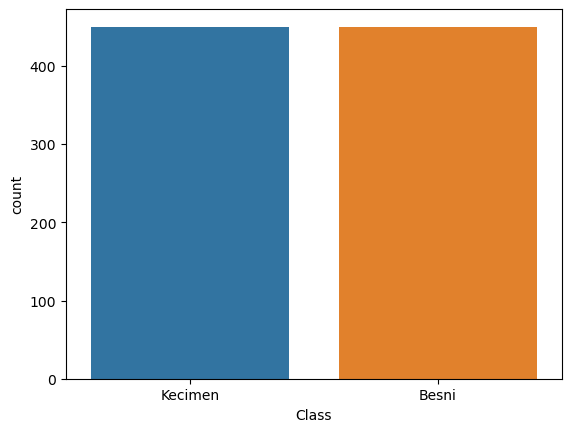

In [128]:
sns.countplot(data=df,x="Class" )

In [129]:
le = LabelEncoder()
for i in df.columns:
    df[i] = le.fit_transform(df[i])
    
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,551,553,500,558,542,811,544,1
1,404,446,409,469,413,299,453,1
2,583,554,581,448,571,102,573,1
3,74,54,159,108,68,394,66,1
4,462,254,709,33,445,890,382,1


In [130]:
X = df.drop('Class', axis=1)
X = X.to_numpy()
y = df['Class']

In [131]:
Y = pd.get_dummies(y).values

In [132]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [133]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(80,input_shape=(7,),activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(Adam(lr=0.04),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 80)                640       
                                                                 
 dense_33 (Dense)            (None, 40)                3240      
                                                                 
 dense_34 (Dense)            (None, 20)                820       
                                                                 
 dense_35 (Dense)            (None, 2)                 42        
                                                                 
Total params: 4,742
Trainable params: 4,742
Non-trainable params: 0
_________________________________________________________________


C:\Users\a\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [134]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
23/23 [==============================] - 0s 7ms/step - loss: 31.7832 - accuracy: 0.6667 - val_loss: 1.1198 - val_accuracy: 0.7500
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 0.9993 - accuracy: 0.7333 - val_loss: 0.8844 - val_accuracy: 0.7222
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5974 - accuracy: 0.7778 - val_loss: 0.4810 - val_accuracy: 0.8222
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4161 - accuracy: 0.8403 - val_loss: 0.3597 - val_accuracy: 0.8389
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4035 - accuracy: 0.8264 - val_loss: 0.3993 - val_accuracy: 0.8667
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4005 - accuracy: 0.8278 - val_loss: 0.3507 - val_accuracy: 0.8444
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 0.3869 - accuracy: 0.8472 - val_loss: 0.3717 - val_accuracy: 0.8444
Epoch 8/100


In [135]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91        97
           1       0.85      0.96      0.90        83

    accuracy                           0.91       180
   macro avg       0.91      0.91      0.91       180
weighted avg       0.91      0.91      0.91       180

[[83 14]
 [ 3 80]]


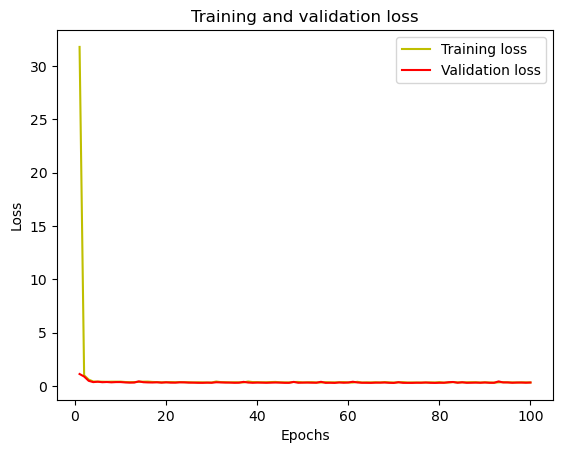

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

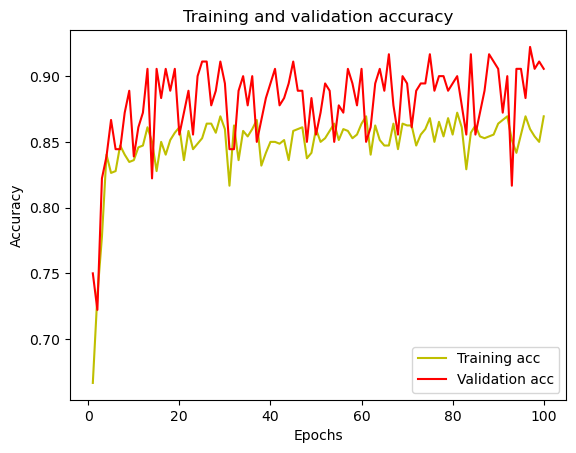

In [137]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()